In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
review_data= pd.read_csv("prepro.csv")
print(review_data.head(2))
print(len(review_data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                              Review
0  Dr. Meadows made me feel comfortable upon our ...
1  Helen is amazing, she helped me open doors tha...
107223


In [ ]:
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords') # run this one time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
review_data.dropna(axis = 0, how ='any',inplace=True)

review_data['Review'] = review_data['Review'].apply(clean_text)
review_data['Num_words_text'] = review_data['Review'].apply(lambda x:len(str(x).split()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


***
Pre-processing the data
***

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
review_data['Review']=review_data['Review'].apply(remove_stopwords)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
review_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Num_words_text
0,meadows made feel comfortable upon first meeti...,23
1,helen amazing helped open doors afraid open ma...,14
2,sharisse excellent counselor listens well help...,17
3,helpful helping figure proactive steps change ...,9
4,cannot express much love eileen counselor week...,55
...,...,...
107218,chandrea washington amazing counselor always s...,16
107219,chandrea good listener gives good advice well ...,21
107220,feel blessed found chandrea better help best t...,21
107221,erika wonderful expertise paired gentle nature...,16


In [ ]:
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-06-01 05:07:29.040949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.5.0/en_core_web_md-3.5.0-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
2023-06-01 05:07:44.098941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-06-01 05:08:15.292990: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loo

In [ ]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

text_list=review_data['Review'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


helen amazing helped open doors afraid open makes every session insightful wisdom
['door', 'afraid', 'open', 'session', 'insightful', 'wisdom']


***
Create vocabulary dictionary and document term matrix
***

In [ ]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.043*"patient" + 0.040*"mental" + 0.035*"health" + 0.019*"approach" + 0.018*"expertise" + 0.018*"issue" + 0.017*"kind" + 0.015*"ability" + 0.014*"area" + 0.014*"understanding"'),
 (1,
  '0.269*"good" + 0.176*"therapist" + 0.038*"listener" + 0.029*"friend" + 0.027*"advice" + 0.016*"therapy" + 0.014*"family" + 0.014*"attention" + 0.013*"perfect" + 0.013*"incredible"'),
 (2,
  '0.098*"helpful" + 0.046*"question" + 0.037*"concern" + 0.037*"thing" + 0.032*"problem" + 0.030*"issue" + 0.028*"situation" + 0.025*"perspective" + 0.020*"advice" + 0.019*"solution"'),
 (3,
  '0.336*"great" + 0.074*"listener" + 0.050*"advice" + 0.038*"counselor" + 0.026*"help" + 0.019*"insight" + 0.016*"deal" + 0.014*"experience" + 0.013*"feedback" + 0.013*"wonderful"'),
 (4,
  '0.105*"amazing" + 0.081*"counselor" + 0.049*"help" + 0.035*"well" + 0.029*"thank" + 0.027*"listen" + 0.025*"thing" + 0.024*"person" + 0.023*"love" + 0.020*"much"'),
 (5,
  '0.074*"supportive" + 0.058*"compassionate" + 0.055*"helpful

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.233591  0.041198       1        1  17.022080
8     -0.148088  0.088346       2        1  12.058944
2      0.006225 -0.109084       3        1  11.921188
4     -0.108693  0.098902       4        1   9.692961
7     -0.203726 -0.028688       5        1   8.995070
6      0.073200 -0.145886       6        1   8.904515
0      0.016655 -0.209812       7        1   8.653608
3      0.165520  0.150120       8        1   8.211926
5      0.230886 -0.189584       9        1   7.826019
1      0.201612  0.304489      10        1   6.713688, topic_info=          Term          Freq         Total Category  logprob  loglift
36       great  25953.000000  25953.000000  Default  30.0000  30.0000
45        good  16994.000000  16994.000000  Default  29.0000  29.0000
11     session  18262.000000  18262.000000  Default  28.0000  28.0000
55   therapist  11123.000000  11123.000000  Default  27.0000  27.0000
18     helpful  15007.000000  15007.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
259     enough    504.592956   2051.052970  Topic10  -4.8287   1.2987
221     honest    485.747844   2204.348166  Topic10  -4.8667   1.1885
102      thing    611.607260  12027.410511  Topic10  -4.6363  -0.2778
67      person    535.757057   5764.204850  Topic10  -4.7687   0.3253
104   feedback    449.692458   2855.119375  Topic10  -4.9439   0.8527

[544 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
296       5  0.242100  ability
296       7  0.757420  ability
39        1  0.301453     able
39        2  0.154570     able
39        3  0.144368     able
...     ...       ...      ...
997       8  0.996448    worry
354       1  0.998753    worth
249       1  0.632218     year
249       5  0.189314     year
249      10  0.178512     year

[651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 3, 5, 8, 7, 1, 4, 6, 2])

In [ ]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.773965120453612

Coherence Score:  0.4880989080386575


In [ ]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


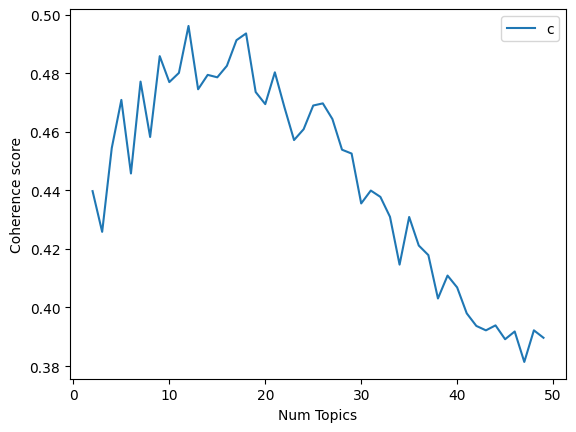

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4397
Num Topics = 3  has Coherence Value of 0.4258
Num Topics = 4  has Coherence Value of 0.4544
Num Topics = 5  has Coherence Value of 0.4708
Num Topics = 6  has Coherence Value of 0.4457
Num Topics = 7  has Coherence Value of 0.4771
Num Topics = 8  has Coherence Value of 0.4582
Num Topics = 9  has Coherence Value of 0.4858
Num Topics = 10  has Coherence Value of 0.4769
Num Topics = 11  has Coherence Value of 0.4801
Num Topics = 12  has Coherence Value of 0.4961
Num Topics = 13  has Coherence Value of 0.4745
Num Topics = 14  has Coherence Value of 0.4794
Num Topics = 15  has Coherence Value of 0.4786
Num Topics = 16  has Coherence Value of 0.4825
Num Topics = 17  has Coherence Value of 0.4912
Num Topics = 18  has Coherence Value of 0.4935
Num Topics = 19  has Coherence Value of 0.4735
Num Topics = 20  has Coherence Value of 0.4694
Num Topics = 21  has Coherence Value of 0.4803
Num Topics = 22  has Coherence Value of 0.4683
Num Topics = 23  has 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Select the model and print the topics
optimal_model = model_list[10]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.061*"friend" + 0.043*"safe" + 0.033*"relationship" + 0.032*"space" + 0.029*"family" + 0.020*"issue" + 0.017*"place" + 0.014*"time" + 0.014*"session" + 0.014*"people"'),
 (1,
  '0.113*"talk" + 0.091*"easy" + 0.057*"session" + 0.020*"time" + 0.020*"comfortable" + 0.019*"thing" + 0.017*"conversation" + 0.017*"personable" + 0.016*"nice" + 0.014*"thought"'),
 (2,
  '0.089*"life" + 0.035*"anxiety" + 0.028*"thing" + 0.024*"tool" + 0.022*"time" + 0.021*"issue" + 0.021*"way" + 0.019*"positive" + 0.018*"many" + 0.018*"different"'),
 (3,
  '0.301*"great" + 0.071*"listener" + 0.046*"advice" + 0.038*"mental" + 0.033*"health" + 0.021*"help" + 0.020*"good" + 0.018*"insight" + 0.018*"issue" + 0.017*"resource"'),
 (4,
  '0.112*"amazing" + 0.107*"time" + 0.068*"help" + 0.040*"life" + 0.034*"well" + 0.031*"short" + 0.024*"thing" + 0.021*"grateful" + 0.018*"point" + 0.017*"situation"'),
 (5,
  '0.185*"helpful" + 0.058*"supportive" + 0.032*"responsive" + 0.030*"thoughtful" + 0.026*"insightful" + 

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.164372  0.106101       1        1  14.153378
4     -0.149098  0.095197       2        1   9.265294
10    -0.177466 -0.133847       3        1   8.798520
9     -0.100959 -0.155427       4        1   8.615605
3      0.113761  0.230162       5        1   8.604167
5      0.224256 -0.011411       6        1   7.908482
8     -0.101988  0.128193       7        1   7.883558
6      0.137975  0.105721       8        1   7.832578
1     -0.010465 -0.169055       9        1   7.429407
0     -0.140953  0.003179      10        1   6.772983
11     0.218093 -0.062891      11        1   6.618342
7      0.151217 -0.135923      12        1   6.117686, topic_info=          Term          Freq         Total Category  logprob  loglift
36       great  24823.000000  24823.000000  Default  30.0000  30.0000
18     helpful  14981.000000  14981.000000  Default  29.0000  29.0000
55   therapist  10968.000000  10968.000000  Default  28.0000  28.0000
107    amazing   9768.000000   9768.000000  Default  27.0000  27.0000
45        good  16462.000000  16462.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
326       mind    587.615777   1596.180713  Topic12  -4.5834   1.7947
352    feeling    702.571739   4654.222057  Topic12  -4.4047   0.9032
292  judgement    507.523313   1292.525863  Topic12  -4.7299   1.8592
11     session    677.952000  18385.287466  Topic12  -4.4404  -0.5062
136   positive    493.215176   4171.515631  Topic12  -4.7585   0.6589

[801 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
39        1  0.315253   able
39        2  0.132164   able
39        3  0.084202   able
39        4  0.100099   able
39        5  0.030986   able
...     ...       ...    ...
249      10  0.116460   year
249      12  0.000521   year
1116      3  0.922906  young
1116      6  0.069983  young
1473     11  0.997852   zone

[2099 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 11, 10, 4, 6, 9, 7, 2, 1, 12, 8])

# TOPIC MODELING FOR EACH THERAPIST REVIEWS

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 113.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pandas as pd

review_data = pd.read_csv('done.csv')
df1 = pd.read_csv('save.csv')

In [ ]:
review_data

NameError: ignored

In [ ]:
df1

,Unnamed: 0,Name,0,1,2,3,4,5,6,7,...,260,261,262,263,264,265,266,267,268,269
0,0,Karen Armstrong,3404,3405.0,3406.0,3407.0,3408.0,3409.0,3410.0,3411.0,...,3664.0,3665.0,3666.0,3667.0,3668.0,3669.0,3670.0,3671.0,3672.0,3673.0
1,1,Velma Jones,52107,52108.0,52109.0,52110.0,52111.0,52112.0,52113.0,52114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Jay Swedlaw,8006,8007.0,8008.0,8009.0,8010.0,8011.0,8012.0,8013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Dr. Terri Sawyer,62193,62194.0,62195.0,62196.0,62197.0,62198.0,62199.0,62200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Dr. Courtney Liggera,59880,59881.0,59882.0,59883.0,59884.0,59885.0,59886.0,59887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,13553,Susan Jacobsen,49847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13554,13554,Leesa Starrett,91559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13555,13555,Dwayne Jacobs,49685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13556,13556,Jordan Jackson,49678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import gensim